#Predicting colours in images and giving accuracy of each colour

The machine is now predicting the colours in given images. I want the machine to give the accuracy score in percentage for each colours and at the end will display what the machine predicts

I will now import the following libraries which deals with predicting images:



*   Pandas - This will work with datasets
*   Sklearn - This will used to predict the data that is given


*   OS - This will be used to allow the machine to access from the OS device, to extract images  
*   Matplotlib - This will work with visualisation  

*   Skimage - From the skimage i have used resize to resize the images when displaying, and imread to read the image to check if it's available in classes.
*   Numpy - This will work with arrays  


*   Pickle - This will be used to convert the images to bits (0 and 1)





In [ ]:
#------------------Importing Libraries------------------
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



# Adding Classes

  I have used array list to add 3 classes which is linked to my folders which is located in Google Drive. So the machine will locate the images in the given classes and give the prediction based on the bellonging classes.
  While and For loop is used to ask the question about what class should the model train and test. Furthermore, i have used if statement to discuss the choices based on the user input.

In [ ]:
Colours=['Blue','Red','Yellow'] #Used array variable "Colours" to insert multiple colour for machine to train and test
print("Type y to give categories or type n to go with classification of Blue, Red and Yellow"); #Printing questions for user input

while(True): #Adds a while loop which displays questions continuously until the user finish entering all the questions that was given or do not input any data in if statement
  check=input() #User input
  if(check=='n' or check=='y'): #If user input (check) is y or n, the check input will break (stop looping)
    break #Breaks the loop
  print("Please give a valid input (y/n)") #If the user inserts other data like "yes" it will print this message
if(check=='y'): #If the user inputs "y" then it will display the following
  print("Enter How Many types of Colours do you want to classify") #This message will be printed when user inputs "n"
  n=int(input()) #Used integer user input to display how many colours to insert which is in the list
  Colours=[] #List of colours that user picks when inputed "n" in the previous line
  print(f'please enter {n} Colours') #When the user gives the number of colours it will print this message which will state "Please enter (collect the number of colours in 'n' variable)Colours"
  for i in range(n): #Use For loop to list the colours that was inputed by the user
    name=input()#This is where we insert the colour name which is in "Colours" list
    Colours.append(name) #Adds the user input in name variable to Colours list
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories") #Prints the message at the end



Type y to give categories or type n to go with classification of Blue, Red and Yellow
n


# Loading the dataset

I have used couple of list array to store the images when the machine has found the image in each classes. "flat_data_arr" list variable is used to store images that is flattened and "target_arr" list variable is used to store list of colours that is stored in the "Colours" list variable which stores list of classes. Can be found above this code.

In [ ]:
flat_data_arr=[] #Use a list "flat_data_arr" to store image that is flattened (single layer)
target_arr=[] #Use a list "target_arr" to store list variable "Colours" which includes Blue, Red and Yellow
datadir='/content/drive/MyDrive/Colours' #Used "datadir" variable to link my images which is in my google drive account.
for i in Colours: #Use For loop to store loading screen
  print(f'loading... category : {i}') #Prints the message "loading... category: (collects the list variables (Colours))"
  path=os.path.join(datadir,i) #Use path variable to connect the OS to google drive and list variable "Colours" which is in For loop
  for img in os.listdir(path): #Uses For loop to go through every picture file in the category directory one by one.
    img_array=imread(os.path.join(path,img)) #Use "img_array" to process the image file which is connected to path
    img_resized=resize(img_array,(150,150,3)) #Use "img_resized"if the machine finds the image it will resize the image to 150, 150, 3
    flat_data_arr.append(img_resized.flatten()) #Adds the resized image to list variable "flat_data_arr"
    target_arr.append(Colours.index(i)) #Adds the current colours that is added to colour list "Colours"
  print(f'loaded category:{i} successfully') #Prints this message when the image is loaded successfully
flat_data=np.array(flat_data_arr) #Use flat_data variable to convert flat_data_arr list which stores flattened images to numpy
target=np.array(target_arr) #Use target variable to convert target_arr list which stores Colours list to numpy
df=pd.DataFrame(flat_data) #Use df variable to create the flat_data which stores flattened images to Pandas
df['Target']=target #Adds coloumn "Target" to hold images
df #Prints the dataframe

loading... category : Blue
loaded category:Blue successfully
loading... category : Red
loaded category:Red successfully
loading... category : Yellow
loaded category:Yellow successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.101608,0.082000,0.685922,0.101608,0.082000,6.859216e-01,0.101608,0.082000,0.685922,0.101608,...,0.074967,4.619655e-02,5.685644e-01,0.070699,4.311980e-02,5.566172e-01,0.070588,4.313725e-02,0.551480,0
1,0.000000,0.203922,0.400000,0.000000,0.203922,4.000000e-01,0.000000,0.203922,0.400000,0.000000,...,0.000000,2.039216e-01,4.000000e-01,0.000000,2.039216e-01,4.000000e-01,0.000000,2.039216e-01,0.400000,0
2,0.003922,0.000000,0.541176,0.003922,0.000000,5.411765e-01,0.003922,0.000000,0.541176,0.003922,...,0.003922,0.000000e+00,5.411765e-01,0.003922,0.000000e+00,5.411765e-01,0.003922,0.000000e+00,0.541176,0
3,0.336732,0.744575,0.858301,0.336732,0.744575,8.583007e-01,0.336732,0.744575,0.858301,0.336732,...,0.004361,6.598562e-02,6.036140e-01,0.008437,5.937054e-02,6.005263e-01,0.011721,5.883019e-02,0.600007,0
4,0.019608,0.015686,0.173315,0.018622,0.015686,1.810717e-01,0.011845,0.015686,0.189368,0.009800,...,0.015670,1.571033e-02,2.196320e-01,0.015686,1.568627e-02,2.196078e-01,0.015686,1.568627e-02,0.219608,0
5,0.011410,0.274155,0.928841,0.011772,0.274517,9.293472e-01,0.014914,0.277659,0.932439,0.015726,...,0.004829,2.858206e-01,9.215998e-01,0.004927,2.857716e-01,9.285665e-01,0.004640,2.859151e-01,0.929412,0
6,0.003922,0.000000,0.541176,0.003922,0.000000,5.411765e-01,0.003922,0.000000,0.541176,0.003922,...,0.003922,0.000000e+00,5.411765e-01,0.003922,0.000000e+00,5.411765e-01,0.003922,0.000000e+00,0.541176,0
7,0.000000,0.000000,0.545098,0.000000,0.000000,5.450980e-01,0.000000,0.000000,0.545098,0.000000,...,0.000000,0.000000e+00,5.450980e-01,0.000000,0.000000e+00,5.450980e-01,0.000000,0.000000e+00,0.545098,0
8,0.568374,0.607590,0.399746,0.569516,0.608731,4.008883e-01,0.572848,0.612063,0.404220,0.576374,...,0.303307,3.737428e-01,2.242908e-01,0.405332,4.666338e-01,3.329409e-01,0.430185,4.933650e-01,0.366101,0
9,0.400000,0.384314,0.105882,0.400000,0.384314,1.058824e-01,0.400000,0.384314,0.105882,0.400000,...,0.470619,4.778843e-01,6.001125e-02,0.477586,4.818683e-01,7.294328e-02,0.478431,4.823529e-01,0.074510,0


Linking Google Drive to Colab which is linked to my account

In [ ]:
from google.colab import drive #Adds google drive in google colab
drive.mount('/content/drive') #Using mount to connect to the content page (positioned to the left)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Adding Indepandant and Depandant variable and Splitting the data

I have added a indepandant variable (x) and depandant variable (y), which allows the machine to pick the images in the classes, however they will avoid the last image which is stored in the data frame.
I have splitted the data into 50% meaning that 50% of data is used to train the machine, however, the remaining 50% will be used to test the data.

In [ ]:
x=df.iloc[:,:-1] #Use indepandant variable (x) to pick the rows from the dataframe except from the last row (-1)
y=df.iloc[:,-1] #Use depandant variable (y) to pick the rows from the dataframe except from the last row (-1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=77,stratify=y) #Uses test_train_split which divides data into 2 (one can be used for training data and another data can be used for testing)
print('Splitted Successfully') #Prints this message when the data is splitted

Splitted Successfully


# Training the model

I have used gamma which turns the parameter into the non linear classification, which meaens machines classifies data that is not separated by lines. Used SVM model to give probability of the classification.

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']} #Use Gamma to turn parameter into non linear classification
svc=svm.SVC(probability=True) #Use SVM wih SVC extention to make sure the machine gives probability when classifying
print("The training of the model is started, please wait for while as it may take few minutes to complete") #Will print this message, to let me know that the machine is starting the model
model=GridSearchCV(svc,param_grid) #Use model variable to configures a Grid Search Cross-Validation (GridSearchCV) for identifying the optimal set of hyperparameters for the SVM model from the given parameter grid (param_grid).
model.fit(x_train,y_train) #It fits the hyperparameters which was chosen in model variable to x_train and y_train data
print('The Model is trained well with the given colours') #When the model is trained, this message will appear
model.best_params_ #Inputs the choice of hyperparameter in model variable

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given colours


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

# Predicting data and giving actual data

I have used "x_pred" variable to predict the data which gives it in array and i have also gave the actual data which is also laid out as array. The same procedure has been done to y test.

In [ ]:
x_pred=model.predict(x_test) #Use independant variable "x_pred" to predict the x_test data
print("The predicted Data is :") #Prints this message when prediction is done
x_pred #Prints the final percentage of predicted data

The predicted Data is :


array([2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 1])

In [ ]:
print("The actual data is:") #prints the actual data
np.array(y_test) #prints the array list of predicted data in dependant varibale "y_test"

The actual data is:


array([2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 0, 1, 2, 2, 0, 1])

This will give the accuracy of the data based on the training of machine in models.

In [ ]:
print(f"The model is {accuracy_score(x_pred,y_test)*100}% accurate") #Uses cofusion matrix to print the percentage of accuracy in x_pred and y_test data

The model is 76.66666666666667% accurate


# Using Pickle to convert image visual data to bytes (0 and 1)

In [ ]:
pickle.dump(model,open('img_model.p','wb')) #Uses pickle model to convert the image to bytes (0 and 1)
print("Pickle is dumped successfully") #Prints this message when pickle is done

Pickle is dumped successfully


# Giving final colour prediction in the image

I have used "url" variable which allows users to insert the URL path in Google Drive, by doing this users will have to copy the path of any images in any class and paste it in the user input, which will display the image (plt.imshow(img)). The loops that has been used is For and While, where For loop lay out the list of classes and probability and the While loop iterate through the code until the machine has got the colours right.

Enter URL of Image/content/drive/MyDrive/Colours/Yellow/yellow car.jpeg


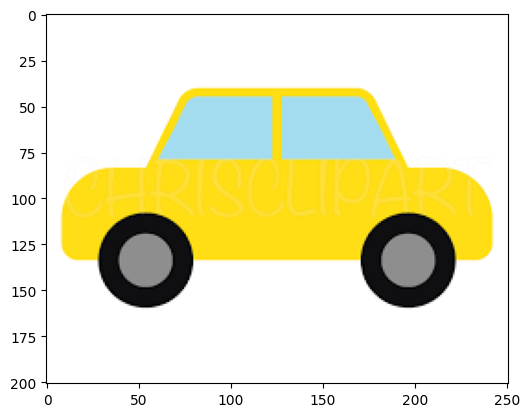

Blue = 6.2565138784211145%
Red = 9.307349057830761%
Yellow = 84.43613706374813%
The predicted colour is : Yellow
Is the colour a Yellow ?(y/n)
y
Thank you for your feedback


In [ ]:
model=pickle.load(open('img_model.p','rb')) #Loads the pre trained model that was performed by machine

url=input('Enter URL of Image') #Use "url" input to insert the path of the image
img=imread(url) #Use "img" variable to read the image which was inputed in URL variable
plt.imshow(img) #Use matplotlib library to insert display the image in matplotlib library
plt.show() #Displayes the image in the screen
img_resize=resize(img,(150,150,3)) #Use "img_resize" to size the displayed image
l=[img_resize.flatten()] #Use "l" varibale to flatten the resize image
probability=model.predict_proba(l) #Use "probability" variable to use trained model by machine to check if the input image matches the colour that was inputed in "Colours" list
for ind,val in enumerate(Colours): #Use For loop to loop (iterate) through the "Colours" list to check if image matches the colours
  print(f'{val} = {probability[0][ind]*100}%') #Gives precentages of colours
print("The predicted colour is : "+Colours[model.predict(l)[0]]) #Machine gives the final answer which is collected in "Colours" list
print(f'Is the colour a {Colours[model.predict(l)[0]]} ?(y/n)') #Prints out the y/n question to see if the colour that the machine has gaved is correct
while(True):#Use while loop to iterate the y and n question until the machine gave the right colour
  b=input() #Use "b" user input variable to input the y and n answer
  if(b=="y" or b=="n"): #Use if statement to calculate what will machine do
    break #Loop will break
  print("please enter either y or n") #Prints the question

if(b=='n'): #If the user input n, then the machine will display the question
  print("What is the colour?") #This question will display when the user inputs no
  for i in range(len(Colours)): #Use For loop to loop through the "Colours" list
    print(f"Enter {i} for {Colours[i]}") #Prints all the colours in the "Colours" list
  k=int(input()) #Use "k" integer variable for user to input the number or colours that machine wants to reprocess
  while(k<0 or k>=len(Colours)): #Use while loop to iterate to check if the colour is out of range which is stored in "Colours" list variable
    print(f"Please enter a valid number between 0-{len(Colours)-1}") #Prints this message when user inputs colours that is not in "Colours" list variable
    k=int(input()) #Use "k" integer to allow user to input new colour in the "Colours" list variable
  print("Please wait for a while for the model to learn from this colour :)") #Prints this message to let me know that the model is re training the colours
  flat_arr=flat_data_arr.copy() #Use flat_arr variable to create a copy of existing list "flat_data_arr"
  tar_arr=target_arr.copy() #Use tar_arr cariable to create a copy of existing list "target_arr"
  tar_arr.append(k) #Adds the copy of "target_arr" list to "k" input variable
  flat_arr.extend(l) #Adds the copy of "flat_data_arr" list to l" input variable
  tar_arr=np.array(tar_arr) #Converts the tar_arr list to numpy
  flat_df=np.array(flat_arr) #Converts the flat_arr list to numpy
  df1=pd.DataFrame(flat_df) #Use "df1" variable to create new dataframe that stores list in flat_arr list
  df1['Target']=tar_arr #Adds the target coloumn to store colours in "tar_arr" list
  model1=GridSearchCV(svc,param_grid) #Use model variable to configures a Grid Search Cross-Validation (GridSearchCV) for identifying the optimal set of hyperparameters for the SVM model from the given parameter grid (param_grid).
  x1=df1.iloc[:,:-1] #Use indepandant variable (x1) to pick the rows from the dataframe except from the last row (-1)
  y1=df1.iloc[:,-1] #Use depandant variable (y1) to pick the rows from the dataframe except from the last row (-1)
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1) #Uses test_train_split which divides data into 2 (one can be used for training data and another data can be used for testing)
  d={} #Use "d" variable to add empty dictionary
  for i in model.best_params_: #Use for loop to create a parameter which will be stored in "d" variable dictionary
    d[i]=[model.best_params_[i]] #It finds the best parameter in the model which is assigned by "d" variable
  model1=GridSearchCV(svc,d) #Use "model1" variable to retrain the machine by using svc model
  model1.fit(x_train1,y_train1) #It fits the model1, so that x_train1 and y_train1 data can be retrained by machine
  y_pred1=model.predict(x_test1) #Use y_pred1 variable to allow the machine to repredict the colours
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate") #Prints the message where it states the accuracy score for each colours in y_pred1 and y_test1 data
  pickle.dump(model1,open('img_model.p','wb')) #Uses pickle model to convert the image to bytes (0 and 1)
print("Thank you for your feedback") #When the machine gets the colour write it will print this message


# Using SVM for non linear problem

I have used SVM to insert the actual data given by machine and create a graph showing the actual data.

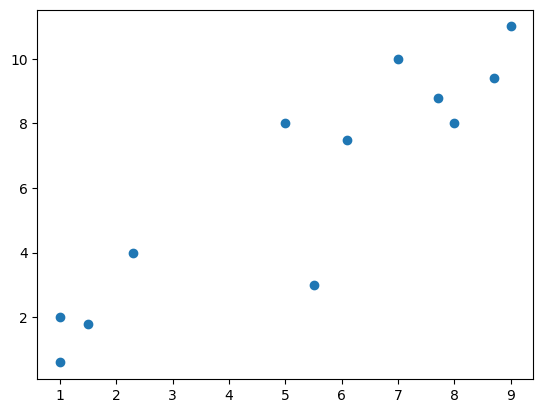

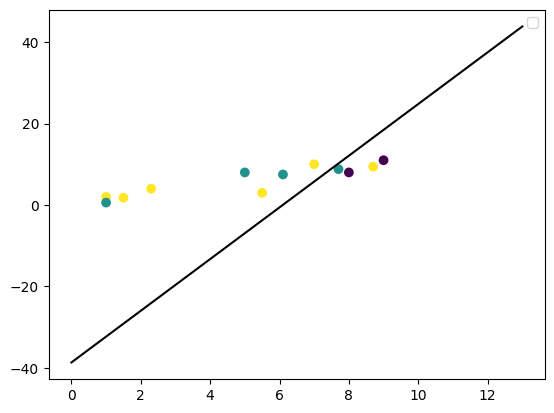

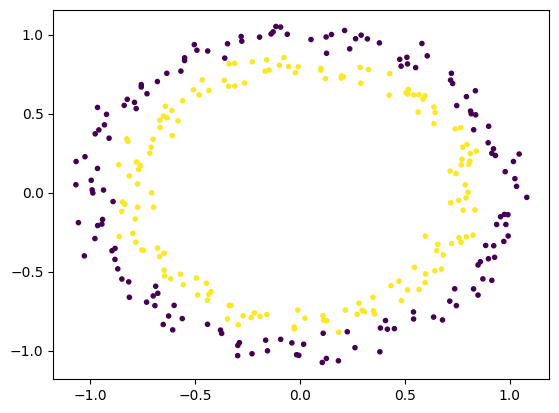

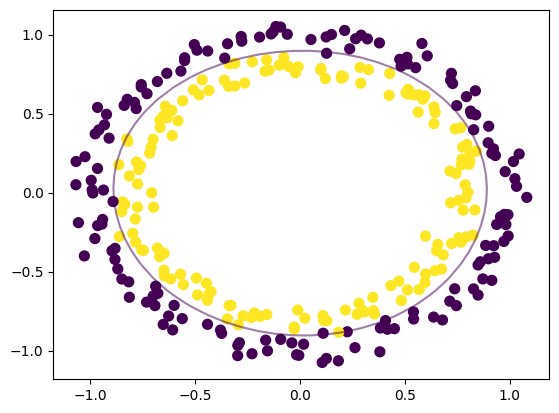

In [ ]:
#------------------Importing Libraries------------------
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

def plot_decision_boundary(model, ax=None): #Uses Function "plot_decision_boundary" to display the binary prediction (classification) models deceision border
    if ax is None: #checks if there are axes set in the graph
        ax = plt.gca() #Plots the current axis in the graph

    xlim = ax.get_xlim()#Uses "xlim" variable to get the x axis
    ylim = ax.get_ylim()#Uses "ylim" variable to get the y axis

    x = np.linspace(xlim[0], xlim[1], 30) #Uses "x" variable to create a starting and ending number point in the graph and leaves out 30 spaces in x axis
    y = np.linspace(ylim[0], ylim[1], 30) #Uses "y" variable to create a starting and ending number point in the graph and leaves out 30 spaces in y axis
    Y, X = np.meshgrid(y, x) #It conbines the x and y axis to form a graph

    xy = np.vstack([X.ravel(), Y.ravel()]).T #Using "xy" variable to shape the data

    P = model.decision_function(xy).reshape(X.shape) #Using "p" variable to get the descision boundary based on the model

    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1]) #Uses "X" variable to create an array to plot the number in the x axis
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5]) #Uses "y" variable to create an array to plot the number in the y axis

plt.scatter(X, y) #Plot the "X" and "y" variable as a scatter points
plt.show() #Displays unclassified data

training_X = np.vstack((X, y)).T #Using "training_X" variable to stack the array of "X" and "y" array variable together.
training_y = [2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1] #Using "training_y" variable to insert the data point in the graph, those data was from the predicted data that the machine has done to predict the colours

clf = svm.SVC(kernel='linear', C=1.0) #Using "clf" variable to define the kernel type (input type for datas) which is linear meaning that it will create a straght line between the data points

clf.fit(training_X, training_y) #Trains the "training_X" and "training_y" array variable

w = clf.coef_[0] #Using "w" variable to retrieve the weight values in the linear equation which is 0 (starting point in the graph)

a = -w[0] / w[1] #Using "a" variable to divide the starting point to the finish point in the graph

XX = np.linspace(0, 13) #Using "XX" variable to space out the linespace in the graph

yy = a * XX - clf.intercept_[0] / w[1] #Uses "yy" variable to get the y values so it can be inputed in the decision boundary

plt.plot(XX, yy, 'k-') #Inputs the decision boundary

plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y) #Plot the "training_X" and "training_y" variable (features) as a scatter points
plt.legend() #Input the line in the graph called legend
plt.show() #Displays the plot

circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05) #Inputs the non linear data in the graph

plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.') #Plot the "circle_X" and "circle_y" variable as a scatter points
plt.show() #Displays the raw non linear data

nonlinear_clf = svm.SVC(kernel='rbf', C=1.0) #Uses "nonlinear_clf" variable to make the non linear algorithm

nonlinear_clf.fit(circle_X, circle_y) #Trains the non linear model

plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50) #Plot the "training_X" and "training_y" variable (features) as a scatter points
plot_decision_boundary(nonlinear_clf) #Inputs the decision boundary
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none') #Plot the x and y data points in the graph
plt.show() #Displays the data and decision boundary

#Using supervised method - KNN to write report of complex matrix

In [ ]:
#------------IMPORTING LIBRARIES-------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Connecting the dataset file for machine to use

I am connecting the data file to machine to use to train with and give accuracy when using KNN. I am also creating the headernames where it will creatre a table which includes the data that is found in the colorsWIKI .data

In [ ]:
#---------------Connecting dataset for machine to use --------------
path = "colorsWIKI .data" # Importing data file for the machine to connect with (colorsWIKI .data)

In [ ]:
headernames = ['Red', 'Green', 'Blue', 'Name', ] #Creating the row name since the table will be inputed

In [ ]:
dataset = pd.read_csv(path, names = headernames) #Connecting the database variable (path) to the table.
dataset.head() #Displayes the 4 coloumn table with data from colorsWIKI .data

,Red,Green,Blue,Name
0,139,0,0,red
1,204,22,0,red
2,206,0,25,red
3,220,0,3,red
4,254,0,0,red


# Adding independant and depandant variable to extract data and splitting the data

I have used independant variable (x1) and dependant variable (y1) to take out datas and leave out rows.

In [ ]:
x1 = dataset.iloc[:, :2].values #Using independant variable to extract the row, setting up the data(Red)
y1 = dataset.iloc[:, 3].values #Using depandent variable to extract the row to train with (Green)

I have splitted the data into 40% meaning that 40% of data is used to train the machine, however, the remaining 40% will be used to test the data.

In [ ]:
from sklearn.model_selection import train_test_split #Using sklearn model to input train_test_split library to split dataset file
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.40) #Splitting the dataset file

I have used StandardScaler to scale the data in the file and adding the calculation of mean and deviation of the training data

In [ ]:
from sklearn.preprocessing import StandardScaler #Using sklearn model with preprocessing exention to imput StandardScaler library
scaler = StandardScaler() #Using StandardScaler to scale the data in the file
scaler.fit(x1_train)#Adding the StandardScaler to calculate the mean and deviation in training data
x1_train = scaler.transform(x1_train) #Transforms the x1_train data which uses parameters of mean and standard deviation that were processed in the fit stage
x1_test = scaler.transform(x1_test) #Transforms the x1_test data which uses parameters of mean and standard deviation that were processed in the fit stage

Using KNeighborsClassifier to create amount of classifiers which makes predictions where i have chosen 8 data.

In [ ]:
from sklearn import neighbors #Using sklearn model to input neighbors library
from sklearn.neighbors import KNeighborsClassifier #Using sklearn with neighbors exention to inpuit KNeighborsClassifier library
classifier = KNeighborsClassifier (n_neighbors= 8) #It creates a classifier of 8 data to make predictions
classifier.fit(x1_train, y1_train) #Trains the data using x1_train and y1_train data

KNeighborsClassifier(n_neighbors=8)

Dependant variable predicts the testing data

In [ ]:
y1_pred = classifier.predict(x1_test) #It predicts the depedant variable y1 in the x1_test data

# Creates the Matrix report

Marix report is where it records the performance of the machines predictions on data's and i have included that to make sure that all the data is predicted correctly and that it gives the accuracy of classifying the data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  #Using model sklearn with extension metrcis to input confusio_matrix and accuracy_score lirary
result = confusion_matrix(y1_test, y1_pred) #Used result variable to create the confusion_matrix with y1_test and y1_pred data.
print("Confussion Matrix:") #Prints the message "Confusion Matrix:"
print(result) #Prints the result of confusion matrix which will give arrays of what the machine classified in the colorsWIKI file
result1 = classification_report(y1_test, y1_pred) #Classifies (generate) the confusion matrix report in the y1_test and y1_pred data
print("Classification Report",) #Prints the message "Classification Report"
print(result1) #Prints the result for generating the confusion report
result2 = accuracy_score(y1_test,y1_pred) #Outputs the score of accuracy based on the classification of y1_test and y1_pred data
print("Accuracy", result2) #Prints the result for accuracy

Confussion Matrix:
[[7 0 0 0 0 0 0]
 [2 0 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 3 2 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 1 0 4 0]]
Classification Report
              precision    recall  f1-score   support

       black       0.78      1.00      0.88         7
        blue       0.00      0.00      0.00         3
       green       0.75      1.00      0.86         3
      orange       0.00      0.00      0.00         0
         red       1.00      0.40      0.57         5
       white       0.50      1.00      0.67         4
      yellow       0.00      0.00      0.00         5

    accuracy                           0.59        27
   macro avg       0.43      0.49      0.42        27
weighted avg       0.54      0.59      0.53        27

Accuracy 0.5925925925925926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.